# Predição da Adoção de Pets

O Pet Adoption Dataset fornece uma visão compreensiva sobre vários fatores que influenciam a probabilidade de um pet ser adotado de um abrigo. O dataset inclui informações detalhadas sobre animais disponíveis para adoção, cobrindo várias caraterísticas e atributos.
 
#### Descrição das Colunas
|Coluna|Descrição|
|-------|--------|
|PetID|Identificador único de cada pet|
|PetType|Tipo do pet (cachorro, gato, etc.)|
|Breed|Raça especifica de cada pet|
|AgeMonths|Idade do pet em meses|
|Color|Cor do pet|
|Size|Tamanho do animal (pequeno, médio, grande)|
|WeightKg|Peso em kg|
|Vaccinated|Status de vacinação|
|HealthCondition|Se o pet é saudável|
|TimeInShelterDays|Quanto tempo em dias que o pet está no abrigo|
|AdoptionFee|Taxa de adoção|
|PreviousOwner|Se o pet teve um dono antes ou não|
|AdoptionLikelihood|Probabilidade do pet ser adotado|

### Objetivos 
O objetivo deste projeto é fazer uma breve análise exploratória para entender os fatores que levam ao aumento da probabilidade de adoção dos pets, e criar um modelo com foco de prever a probabilidade de adoção dos pets. 

![cachorro](https://github.com/datalopes1/pet_adoption/blob/main/doc/img/jana-shnipelson-j_Z5N9p_XOc-unsplash.jpg?raw=true)

# 1. Importação das bibliotecas e carregamento dos dados

In [1]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Análise Exploratória de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning 
from sklearn import metrics
from sklearn import model_selection
from sklearn import pipeline

from sklearn import tree
from sklearn import linear_model
from sklearn import ensemble

# Feature Engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation
from feature_engine import encoding

# Configurações do notebook
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
my_palette = sns.color_palette(["#023E8A", "#0077B6", "#0096C7", "#00B4D8", "#48CAE4", "#90E0EF", "#ADE8F4", "#CAF0F8"])
sns.set_palette(my_palette)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 40)

In [2]:
data = pd.read_csv("../data/raw/pet_adoption_data.csv")

# 2. Sobre o dataset

## 2.1. Estrutura

In [3]:
data.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [4]:
data.tail()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
2002,2502,Dog,Poodle,72,Orange,Small,27.039045,1,0,66,26,1,1
2003,2503,Rabbit,Rabbit,124,Brown,Small,4.726954,1,1,59,150,0,0
2004,2504,Rabbit,Rabbit,113,Orange,Small,1.758592,1,0,68,302,0,0
2005,2505,Dog,Labrador,12,Gray,Large,20.961592,1,0,59,478,0,0
2006,2506,Rabbit,Rabbit,126,White,Medium,18.519788,1,0,10,267,1,0


In [5]:
print(f"O dataset tem {data.shape[0]} linhas e {data.shape[1]} colunas")
print(f"O dataset tem {len(data.select_dtypes(exclude = 'number').columns.to_list())} variáveis categóricas")
print(f"O dataset tem {len(data.select_dtypes(include = 'number').columns.to_list())} variáveis numéricas")

O dataset tem 2007 linhas e 13 colunas
O dataset tem 4 variáveis categóricas
O dataset tem 9 variáveis numéricas


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


O dataset não possui dados nulos, vou fazer uma checagem por dados duplicados, antes de prosseguir.

In [7]:
print(f"O dataset tem {data.duplicated().sum()} dados duplicados.")

O dataset tem 0 dados duplicados.


## 2.2. Estatísticas descritivas

In [8]:
data.drop(columns = 'PetID', axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
AgeMonths,2007.0,92.279522,52.148363,1.000000,48.000000,94.000000,138.00000,179.000000
WeightKg,2007.0,15.705776,8.327749,1.018198,8.730396,15.925416,22.73718,29.995628
Vaccinated,2007.0,0.701046,0.457914,0.000000,0.000000,1.000000,1.00000,1.000000
HealthCondition,2007.0,0.196313,0.397307,0.000000,0.000000,0.000000,0.00000,1.000000
TimeInShelterDays,2007.0,43.974091,25.740253,1.000000,21.000000,45.000000,66.00000,89.000000
AdoptionFee,2007.0,249.142003,142.887040,0.000000,127.000000,242.000000,375.00000,499.000000
PreviousOwner,2007.0,0.301943,0.459215,0.000000,0.000000,0.000000,1.00000,1.000000
AdoptionLikelihood,2007.0,0.328351,0.469730,0.000000,0.000000,0.000000,1.00000,1.000000


Os dados não possuem nenhuma discrepancia aparente, a média e mediana das variáveis numéricas segue bem próxima indicando ausência de outliers.

## 2.3. Dados de treino e teste

Para prosseguir o projeto vou fazer uma divisão prévia nos dados em arquivos de treino e teste, para trabalhar a construção do modelo e dessa forma ter dados "puros" para os testes pós modelagem. 

In [9]:
train, test = model_selection.train_test_split(data, test_size = 0.20, stratify = data['AdoptionLikelihood'], random_state = 42)

train.to_csv("../data/processed/train.csv", index = False)
test.to_csv("../data/processed/test.csv", index = False)

In [10]:
df = pd.read_csv("../data/processed/train.csv")
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,2114,Cat,Siamese,172,White,Large,7.489573,0,0,70,476,0,0
1,2486,Bird,Parakeet,148,White,Medium,23.903091,1,0,85,437,0,0
2,1573,Dog,Poodle,93,Gray,Large,26.039470,1,0,52,451,0,0
3,2221,Cat,Persian,106,White,Large,17.110227,0,0,6,298,0,0
4,1383,Cat,Siamese,89,White,Medium,10.598766,1,0,27,10,0,1


In [11]:
df.shape

(1605, 13)

# 3. Análise Exploratória de Dados

#### Vou criar primeiro um dataset somente com os animais adotados

In [12]:
adopted = df[df['AdoptionLikelihood'] == 1].copy()

## 3.1. Tipo de animal

In [13]:
df.groupby("PetType").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,PetType,Count
2,Dog,421
3,Rabbit,397
1,Cat,396
0,Bird,391


Cães são o tipo de animal mais frequente dentro do conjunto de dados, coelhos e gatos estão praticamente empatados. 

In [14]:
ptype = adopted.groupby("PetType").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
ptype

,PetType,Count
2,Dog,202
0,Bird,119
1,Cat,106
3,Rabbit,100


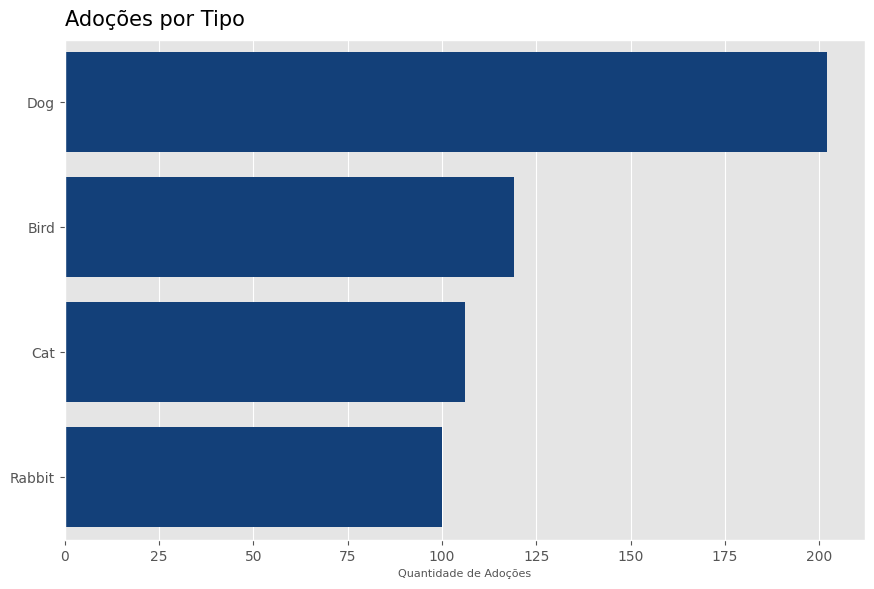

In [15]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(ptype, x = 'Count', y = 'PetType')
ax.set_title("Adoções por Tipo", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Quantidade de Adoções", fontsize = 8)
ax.set_ylabel("")
plt.show()

Com maior volume de animais em abrigos, cachorros também são os pets mais adotados. Seguidos por passáros e gatos. 

## 3.2. Raça do animal

In [16]:
df.groupby(["Breed", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,Breed,PetType,Count
5,Rabbit,Rabbit,397
2,Parakeet,Bird,391
3,Persian,Cat,202
6,Siamese,Cat,194
1,Labrador,Dog,157
4,Poodle,Dog,133
0,Golden Retriever,Dog,131


Não existe distinção entre as raças de coelhos, entre os passáros somente periquitos estão disponíveis. 

In [17]:
breed = adopted.groupby(["Breed", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
breed

,Breed,PetType,Count
2,Parakeet,Bird,119
1,Labrador,Dog,115
5,Rabbit,Rabbit,100
6,Siamese,Cat,54
3,Persian,Cat,52
4,Poodle,Dog,48
0,Golden Retriever,Dog,39


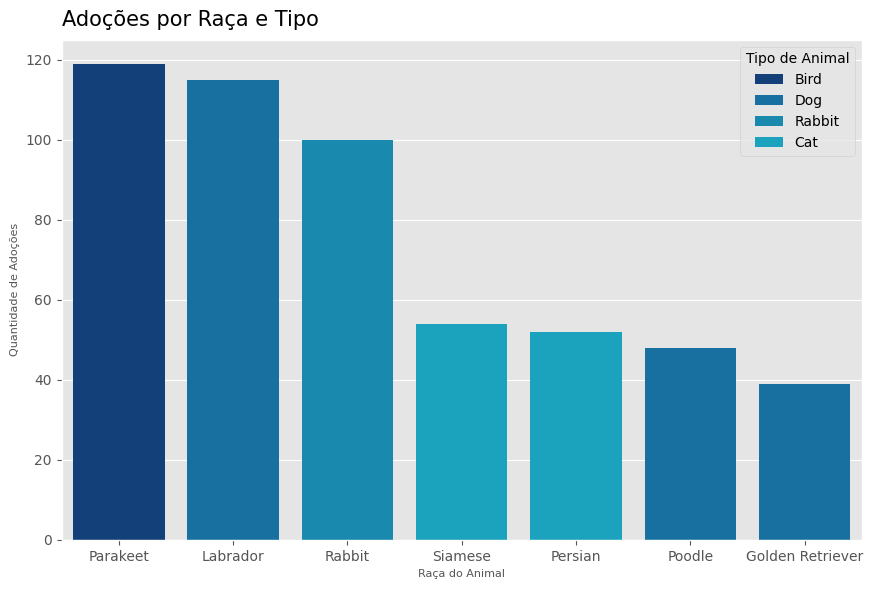

In [18]:
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(breed, y = 'Count', x = 'Breed', hue = 'PetType')
ax.set_title("Adoções por Raça e Tipo", loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel("Raça do Animal", fontsize = 8)
ax.set_ylabel("Quantidade de Adoções", fontsize = 8)
plt.legend(title = 'Tipo de Animal')
plt.show()

Entre os tipos de animais de estimação que tem raças definidas, os cães da raça Labrador são os mais adotados. 

## 3.3. Idade em Meses

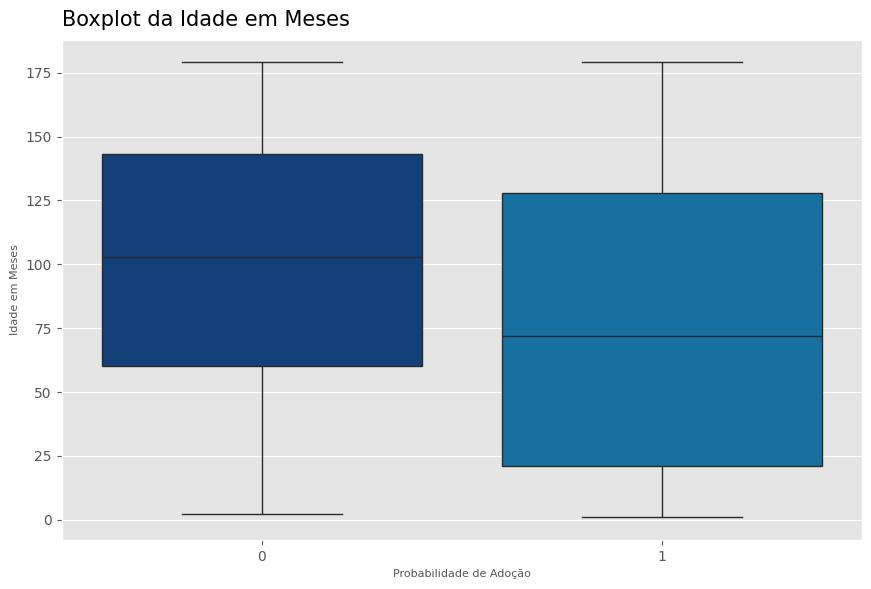

In [19]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, y = 'AgeMonths', x = 'AdoptionLikelihood', palette=my_palette)
ax.set_title('Boxplot da Idade em Meses', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Probabilidade de Adoção', fontsize = 8)
ax.set_ylabel('Idade em Meses', fontsize = 8)
plt.show()

Pets mais velhos tem menor probabilidade de adoção, o fator saúde é o mais importante critério na adoção de animais.

## 3.4. Cor

In [20]:
color = adopted.groupby(["Color"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
color

,Color,Count
2,Gray,113
3,Orange,110
0,Black,109
1,Brown,98
4,White,97


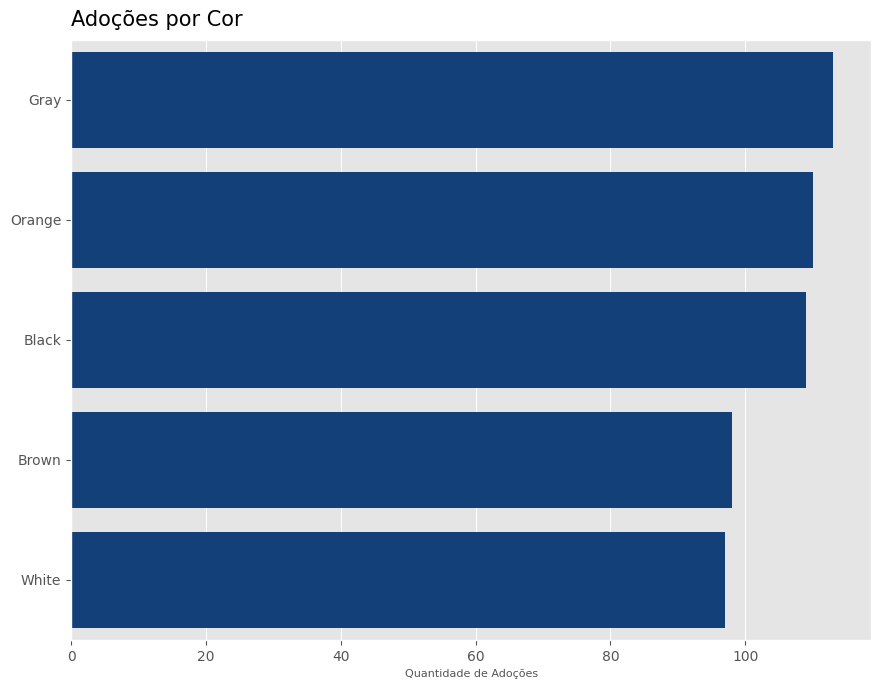

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(color, y = 'Color', x = 'Count')
ax.set_title('Adoções por Cor', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Quantidade de Adoções', fontsize = 8)
ax.set_ylabel('')
plt.show()

## 3.5. Tamanho

In [22]:
df.groupby("Size").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)

,Size,Count
1,Medium,564
2,Small,548
0,Large,493


In [23]:
size = adopted.groupby("Size").agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
size

,Size,Count
1,Medium,350
2,Small,97
0,Large,80


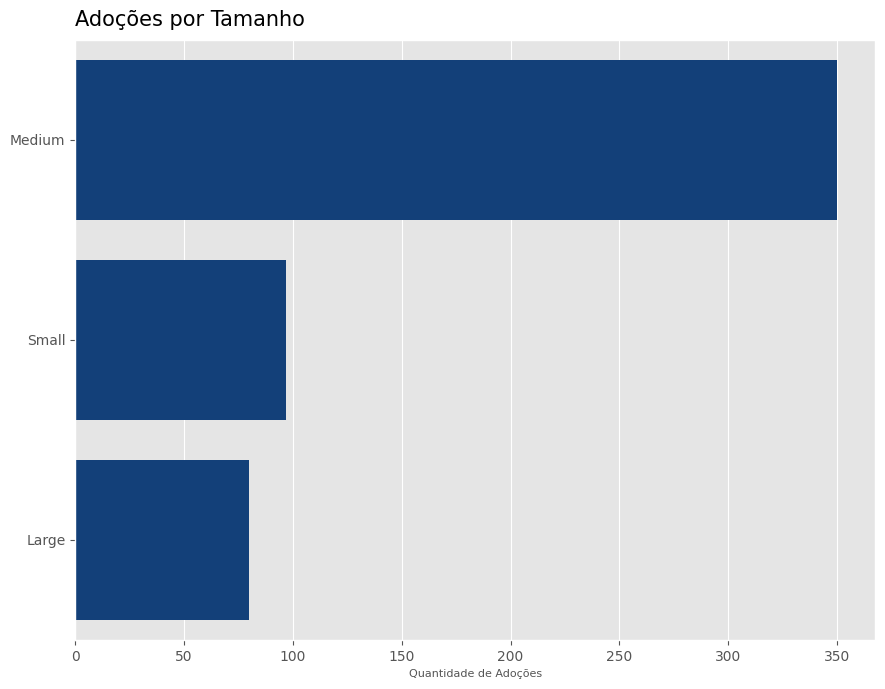

In [24]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(size, x = 'Count', y = 'Size')
ax.set_title('Adoções por Tamanho', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Quantidade de Adoções', fontsize = 8)
ax.set_ylabel('')
plt.show()

Animais de tamanho médio são a maioria tanto em quantidade nos abrigos, quanto em adoções. Animais de porte maior são os menos adotados. Vamos olhar de forma mais detalhada por tipo de animal.

In [25]:
size_a = adopted.groupby(["Size", "PetType"]).agg(Count = ('AdoptionLikelihood', 'count')).reset_index().sort_values(by = 'Count', ascending = False)
size_a

,Size,PetType,Count
6,Medium,Dog,107
4,Medium,Bird,88
5,Medium,Cat,83
7,Medium,Rabbit,72
10,Small,Dog,52
2,Large,Dog,43
8,Small,Bird,18
11,Small,Rabbit,18
1,Large,Cat,14
0,Large,Bird,13


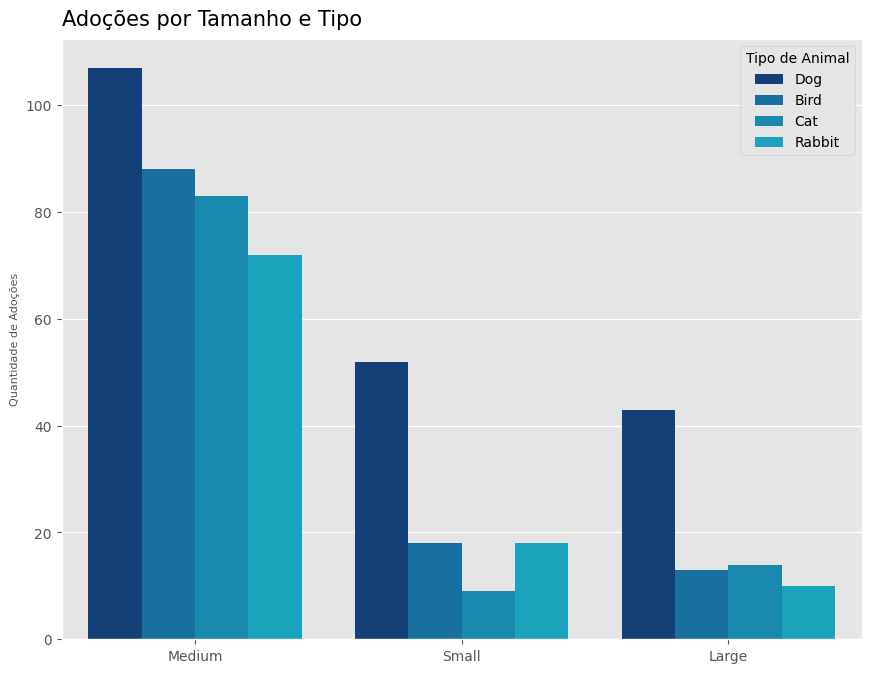

In [26]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(size_a, x = 'Size', y = 'Count', hue = 'PetType')
ax.set_title('Adoções por Tamanho e Tipo', loc = 'left', fontsize = 15, pad = 10)
ax.set_ylabel('Quantidade de Adoções', fontsize = 8)
ax.set_xlabel('')
plt.legend(title = 'Tipo de Animal')
plt.show()

## 3.6. Peso

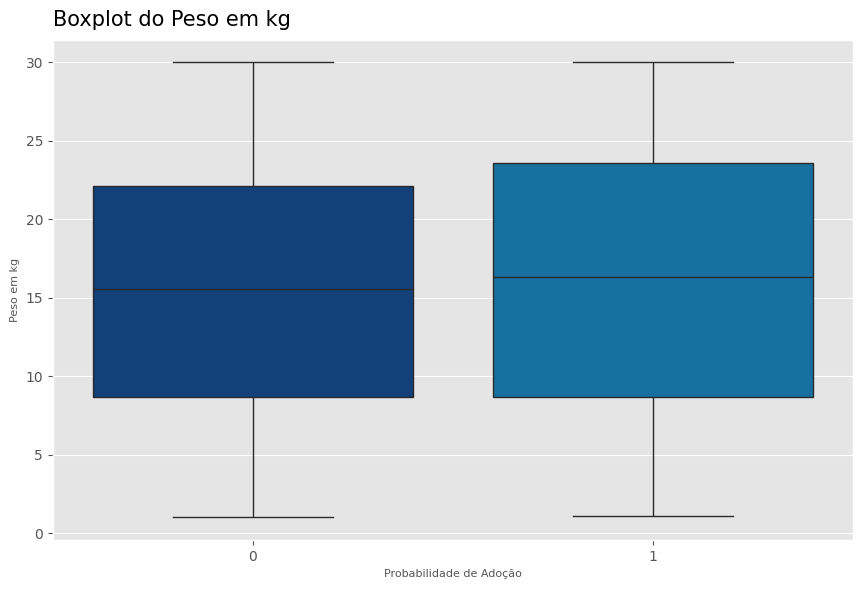

In [27]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, y = 'WeightKg', x = 'AdoptionLikelihood', palette = my_palette)
ax.set_title('Boxplot do Peso em kg', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Probabilidade de Adoção', fontsize = 8)
ax.set_ylabel('Peso em kg', fontsize = 8)
plt.show()

O peso dos animais pode ser um indicativo de boa saúde que é um dos vários critérios importantes ao adotar um pet. 

## 3.7. Vacinação

In [28]:
df.groupby('Vaccinated').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()

,Vaccinated,Count
0,0,479
1,1,1126


In [29]:
vax = adopted.groupby('Vaccinated').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()
vax

,Vaccinated,Count
0,0,53
1,1,474


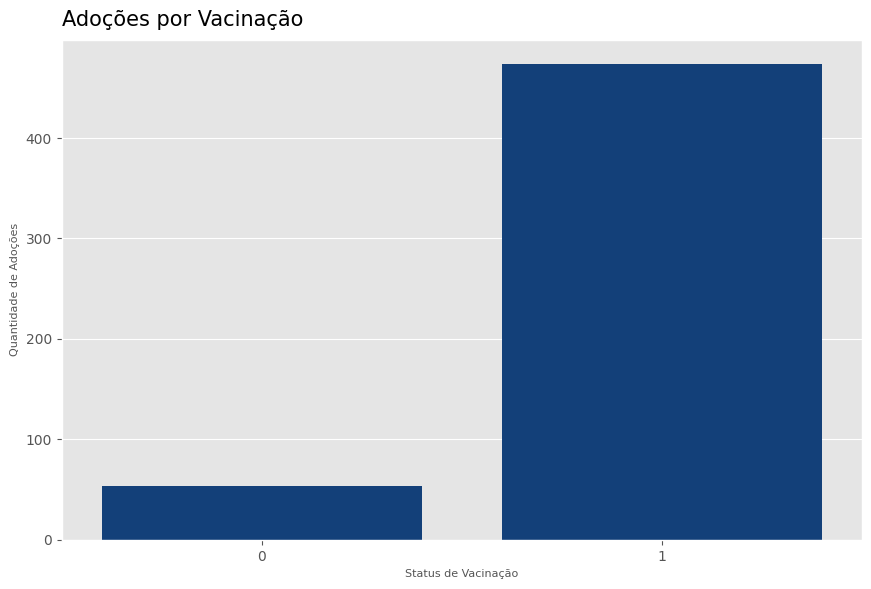

In [30]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(vax, x = 'Vaccinated', y = 'Count')
ax.set_title('Adoções por Vacinação', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Status de Vacinação', fontsize = 8)
ax.set_ylabel('Quantidade de Adoções', fontsize = 8)
plt.show()

Adoção tem uma forte influência sobre a adoção, fatores de saúde são um dos principais critérios na adoção.

## 3.8. Condições de Saúde

In [31]:
df.groupby('HealthCondition').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()

,HealthCondition,Count
0,0,1302
1,1,303


In [32]:
health = adopted.groupby('HealthCondition').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()
health

,HealthCondition,Count
0,0,502
1,1,25


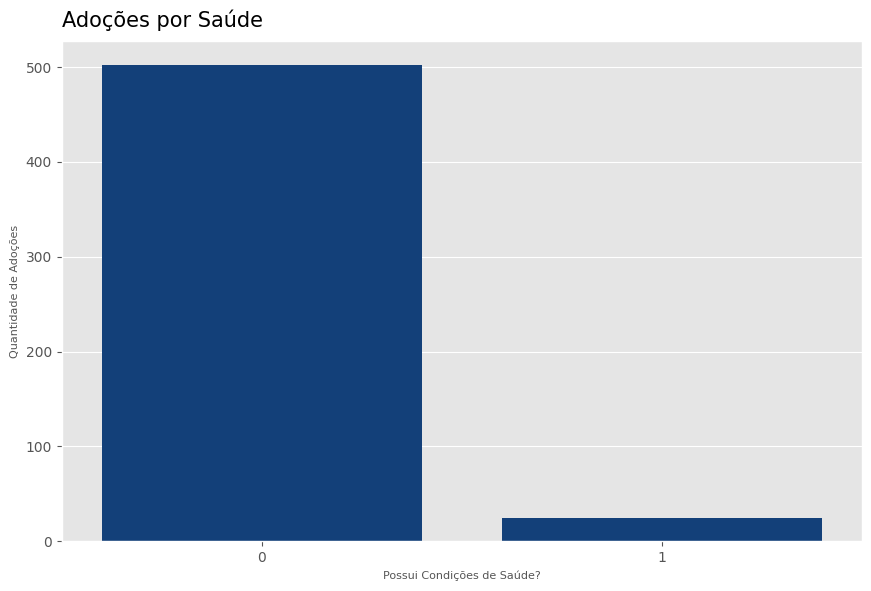

In [33]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(health, x = 'HealthCondition', y = 'Count')
ax.set_title('Adoções por Saúde', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Possui Condições de Saúde?', fontsize = 8)
ax.set_ylabel('Quantidade de Adoções', fontsize = 8)
plt.show()

Existe uma baixíssima quantidade de bichinhos doentes adotados, acolher animais com saúde debilitada é bastante raro e feito por pessoas com maior conhecimento sobre animais e melhores condições financeiras. 

## 3.9. Tempo no Abrigo

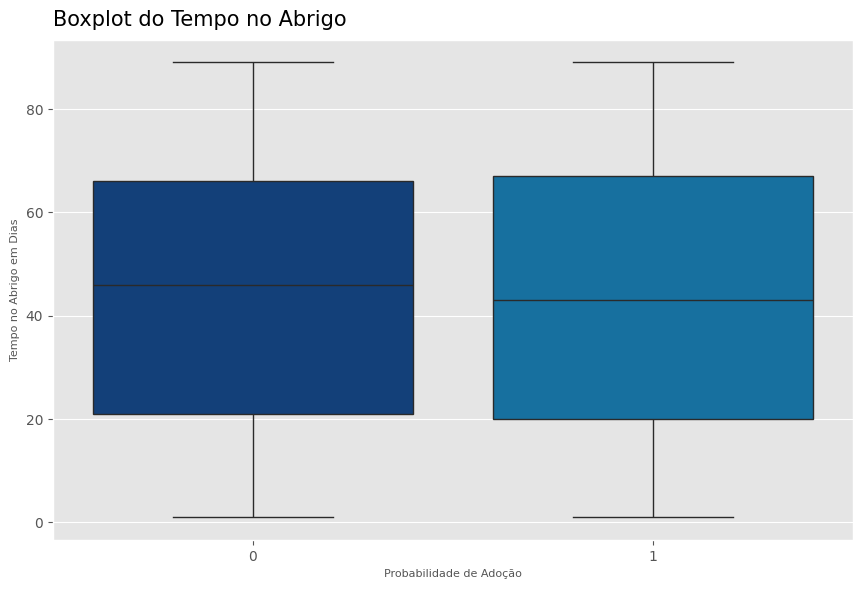

In [34]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'AdoptionLikelihood', y = 'TimeInShelterDays', palette = my_palette)
ax.set_title('Boxplot do Tempo no Abrigo', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Probabilidade de Adoção', fontsize = 8)
ax.set_ylabel('Tempo no Abrigo em Dias', fontsize = 8)
plt.show()

A diferença é pequena mas animais com mais tempo de abrigo tem maior probabilidade de adoção. 

## 3.10. Taxa de Adoção 

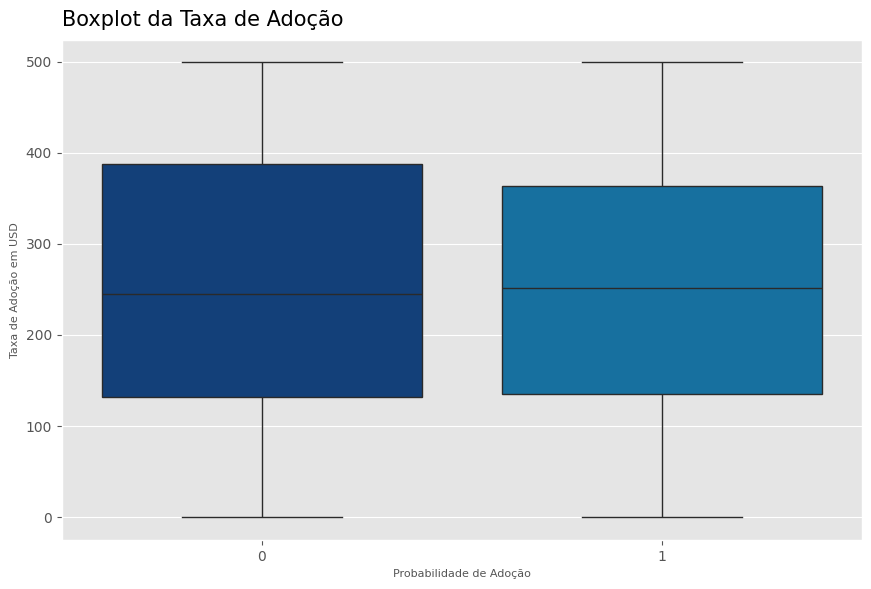

In [35]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.boxplot(df, x = 'AdoptionLikelihood', y = 'AdoptionFee', palette = my_palette)
ax.set_title('Boxplot da Taxa de Adoção', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Probabilidade de Adoção', fontsize = 8)
ax.set_ylabel('Taxa de Adoção em USD', fontsize = 8)
plt.show()

## 3.11. Já Teve Donos?

In [36]:
df.groupby('PreviousOwner').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()

,PreviousOwner,Count
0,0,1126
1,1,479


In [37]:
owner = adopted.groupby('PreviousOwner').agg(Count = ('AdoptionLikelihood', 'count')).reset_index()
owner

,PreviousOwner,Count
0,0,382
1,1,145


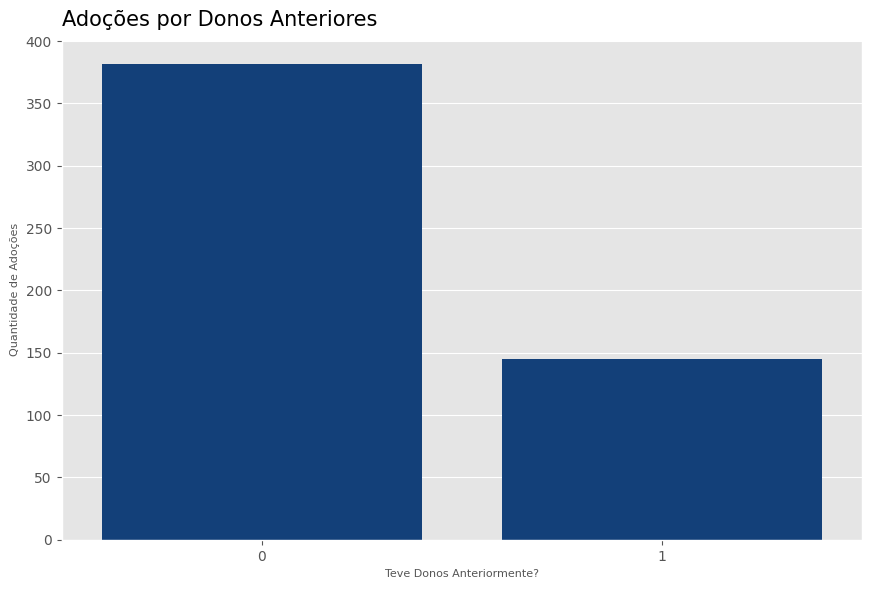

In [38]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_axes([0, 0, 1, 1])

sns.barplot(owner, x = 'PreviousOwner', y = 'Count')
ax.set_title('Adoções por Donos Anteriores', loc = 'left', fontsize = 15, pad = 10)
ax.set_xlabel('Teve Donos Anteriormente?', fontsize = 8)
ax.set_ylabel('Quantidade de Adoções', fontsize = 8)
plt.show()

Os pets que já tiveram donos anteriormente tendem a ser menos adotados. 

## 3.12. Conclusões pós EDA

- Cães são os animais de estimação mais adotados; 
- Periquitos estão na segunda posição;
- Fatores de saúde do animal tem forte influência na decisão de adotar ou não;
- O preço da taxa de adoção também faz diferença na adoção. 

![gato](https://github.com/datalopes1/pet_adoption/blob/main/doc/img/alisa-matthews-ZtHbp39rjIM-unsplash.jpg?raw=true)

# 4. Modelo de Classificação para Predição

## 4.1. Trabalhando as Features

#### Seleção das features 

In [39]:
features = df.columns.to_list()[1:-1]
target = 'AdoptionLikelihood'

In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df[features],
                                                                    df[target],
                                                                    test_size=0.20,
                                                                    random_state=42,
                                                                    stratify=df[target])

print("Taxa de Adoção Treino: ", y_train.mean())
print("Taxa de Adoção Teste: ", y_test.mean())

Taxa de Adoção Treino:  0.32866043613707163
Taxa de Adoção Teste:  0.32710280373831774


In [41]:
# Dividindo as variáveis categóricas e numéricas

cat_features = X_test.select_dtypes(exclude = 'number').columns.to_list()
num_features = X_test.select_dtypes(include = 'number').columns.to_list()

#### Pré-processamento

In [42]:
# Lidando com as variáveis categóricas

onehot = encoding.OneHotEncoder(variables=cat_features)

In [43]:
# As imputações

num_imputer = imputation.MeanMedianImputer(imputation_method = 'median', variables = num_features)
cat_imputer = imputation.CategoricalImputer(imputation_method = 'frequent', variables = cat_features)

## 4.2. Random Forest Classifier

In [44]:
model = ensemble.RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 150, 250, 500],
    'min_samples_leaf': [10, 20, 30, 50, 100]
}

grid = model_selection.GridSearchCV(model, 
                                    param_grid = params,
                                    n_jobs=-1,
                                    cv = 5,
                                    scoring = "roc_auc")

rf = pipeline.Pipeline([
    ('imp_1', num_imputer),
    ('imp_2', cat_imputer),
    ('ohe', onehot),
    ('model', grid)
])

rf.fit(X_train, y_train)

Pipeline(steps=[('imp_1',
                 MeanMedianImputer(variables=['AgeMonths', 'WeightKg',
                                              'Vaccinated', 'HealthCondition',
                                              'TimeInShelterDays',
                                              'AdoptionFee',
                                              'PreviousOwner'])),
                ('imp_2',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PetType', 'Breed', 'Color',
                                               'Size'])),
                ('ohe',
                 OneHotEncoder(variables=['PetType', 'Breed', 'Color',
                                          'Size'])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'min_samples_leaf': [10, 20, 30, 50,
                                                               100],
                                          'n_estimators': [100, 150, 250, 500]},
                              scoring='roc_auc'))])

In [45]:
# Predições

y_train_predict = rf.predict(X_train)
y_train_proba = rf.predict_proba(X_train)[:,1]

y_test_predict = rf.predict(X_test)
y_test_proba = rf.predict_proba(X_test)[:,1]

In [46]:
# Métricas

acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print(f"Acurácia da base de treino: {acc_train}")
print(f"Acurácia da base de teste: {acc_test}")

auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
print(f"AUC da base de treino: {auc_train}")
print(f"AUC da base de teste: {auc_test}")

acc_diff = (acc_train - acc_test) * 100
auc_diff = (auc_train - auc_test) * 100
print(f"Diferença de {round(acc_diff, 4)}% entre treino e teste na Acurácia")
print(f"Diferença de {round(auc_diff, 4)}% entre treino e teste para AUC")

Acurácia da base de treino: 0.9454828660436138
Acurácia da base de teste: 0.9314641744548287
AUC da base de treino: 0.9552292145456944
AUC da base de teste: 0.908068783068783
Diferença de 1.4019% entre treino e teste na Acurácia
Diferença de 4.716% entre treino e teste para AUC


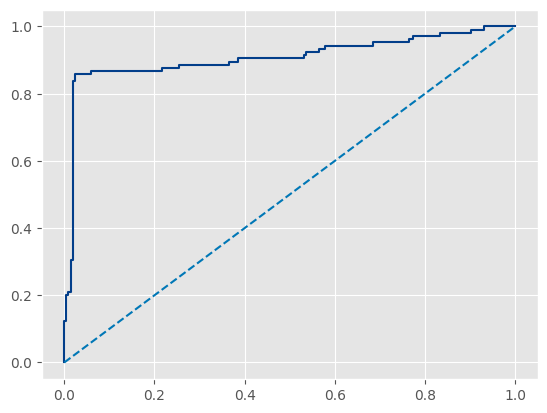

In [47]:
roc_curve = metrics.roc_curve(y_test, y_test_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
plt.show()

## 4.3. Decision Tree Classifier

In [48]:
model = tree.DecisionTreeClassifier(random_state=42)

params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = model_selection.GridSearchCV(model, 
                                    param_grid = params,
                                    n_jobs=-1,
                                    cv = 5,
                                    scoring = "roc_auc")

dt = pipeline.Pipeline([
    ('imp_1', num_imputer),
    ('imp_2', cat_imputer),
    ('ohe', onehot),
    ('model', grid)
])

dt.fit(X_train, y_train)

Pipeline(steps=[('imp_1',
                 MeanMedianImputer(variables=['AgeMonths', 'WeightKg',
                                              'Vaccinated', 'HealthCondition',
                                              'TimeInShelterDays',
                                              'AdoptionFee',
                                              'PreviousOwner'])),
                ('imp_2',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PetType', 'Breed', 'Color',
                                               'Size'])),
                ('ohe',
                 OneHotEncoder(variables=['PetType', 'Breed', 'Color',
                                          'Size'])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [None, 10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]},
                              scoring='roc_auc'))])

In [49]:
# Predições

y_train_predict = dt.predict(X_train)
y_train_proba = dt.predict_proba(X_train)[:,1]

y_test_predict = dt.predict(X_test)
y_test_proba = dt.predict_proba(X_test)[:,1]

In [50]:
# Métricas

acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print(f"Acurácia da base de treino: {acc_train}")
print(f"Acurácia da base de teste: {acc_test}")

auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
print(f"AUC da base de treino: {auc_train}")
print(f"AUC da base de teste: {auc_test}")

acc_diff = (acc_train - acc_test) * 100
auc_diff = (auc_train - auc_test) * 100
print(f"Diferença de {round(acc_diff, 4)}% entre treino e teste na Acurácia")
print(f"Diferença de {round(auc_diff, 4)}% entre treino e teste para AUC")

Acurácia da base de treino: 0.956386292834891
Acurácia da base de teste: 0.9158878504672897
AUC da base de treino: 0.986782639293608
AUC da base de teste: 0.9057539682539683
Diferença de 4.0498% entre treino e teste na Acurácia
Diferença de 8.1029% entre treino e teste para AUC


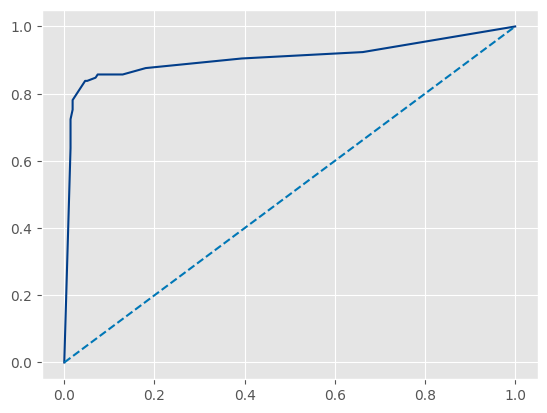

In [51]:
roc_curve = metrics.roc_curve(y_test, y_test_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
plt.show()

## 4.4. Logistic Regression

In [52]:
model = linear_model.LogisticRegression(max_iter=1000, random_state=42)

params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'sag']
}

grid = model_selection.GridSearchCV(model, 
                                    param_grid = params,
                                    n_jobs=-1,
                                    cv = 5,
                                    scoring = "roc_auc")

lr = pipeline.Pipeline([
    ('imp_1', num_imputer),
    ('imp_2', cat_imputer),
    ('ohe', onehot),
    ('model', grid)
])

lr.fit(X_train, y_train)

Pipeline(steps=[('imp_1',
                 MeanMedianImputer(variables=['AgeMonths', 'WeightKg',
                                              'Vaccinated', 'HealthCondition',
                                              'TimeInShelterDays',
                                              'AdoptionFee',
                                              'PreviousOwner'])),
                ('imp_2',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['PetType', 'Breed', 'Color',
                                               'Size'])),
                ('ohe',
                 OneHotEncoder(variables=['PetType', 'Breed', 'Color',
                                          'Size'])),
                ('model',
                 GridSearchCV(cv=5,
                              estimator=LogisticRegression(max_iter=1000,
                                                           random_state=42),
                              n_jobs=-1,
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'sag']},
                              scoring='roc_auc'))])

In [53]:
# Predições

y_train_predict = lr.predict(X_train)
y_train_proba = lr.predict_proba(X_train)[:,1]

y_test_predict = lr.predict(X_test)
y_test_proba = lr.predict_proba(X_test)[:,1]

In [54]:
# Métricas

acc_train = metrics.accuracy_score(y_train, y_train_predict)
acc_test = metrics.accuracy_score(y_test, y_test_predict)
print(f"Acurácia da base de treino: {acc_train}")
print(f"Acurácia da base de teste: {acc_test}")

auc_train = metrics.roc_auc_score(y_train, y_train_proba)
auc_test = metrics.roc_auc_score(y_test, y_test_proba)
print(f"AUC da base de treino: {auc_train}")
print(f"AUC da base de teste: {auc_test}")

acc_diff = (acc_train - acc_test) * 100
auc_diff = (auc_train - auc_test) * 100
print(f"Diferença de {round(acc_diff, 4)}% entre treino e teste na Acurácia")
print(f"Diferença de {round(auc_diff, 4)}% entre treino e teste para AUC")

Acurácia da base de treino: 0.9166666666666666
Acurácia da base de teste: 0.9096573208722741
AUC da base de treino: 0.9414208112952354
AUC da base de teste: 0.9051587301587302
Diferença de 0.7009% entre treino e teste na Acurácia
Diferença de 3.6262% entre treino e teste para AUC


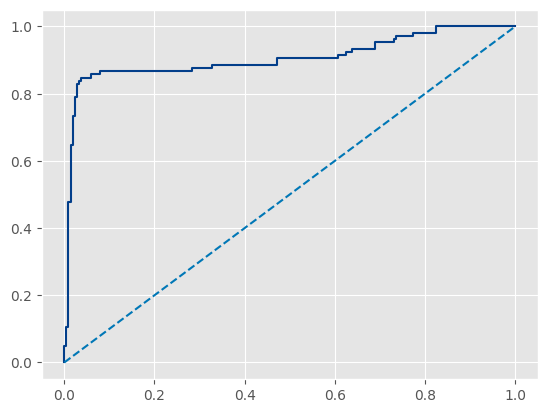

In [55]:
roc_curve = metrics.roc_curve(y_test, y_test_proba)
plt.plot(roc_curve[0], roc_curve[1] )
plt.grid(True)
plt.plot([0,1], [0,1], '--')
plt.show()

## 4.5. A escolha do modelo

#### Acurácia 

|Modelo|Pontuação|
|------|---------|
|Random Forest Treino|0.9454|
|Random Forest Teste|0.9314|
|Descision Tree Treino|0.9563|
|Decision Tree Teste|0.9158|
|Logistic Regression Treino|0.9166|
|Logistic Regression Teste|0.9096|

O modelo com maior acurácia em testes foi o Random Forest, mas o que apresenta o melhor ajuste é o Logistic Regression. O modelo Decision Tree tem uma diferença próxima à 0,05 sendo o pior ajuste. 

#### ROC AUC

|Modelo|Pontuação|
|------|---------|
|Random Forest Treino|0.9552|
|Random Forest Teste|0.9080|
|Descision Tree Treino|0.9867|
|Decision Tree Teste|0.9057|
|Logistic Regression Treino|0.9414|
|Logistic Regression Teste|0.9051|

O modelo com o maior Score AUC foi a Decision Tree mas ela apresenta uma grande diferença entre treino e teste (acima dos 0,05) e não tem o melhor ajuste. Novamente neste critério, o melhor ajuste foi do modelo Logistic Regression. Que portando será o modelo escolhido.

![periquito](https://github.com/datalopes1/pet_adoption/blob/main/doc/img/dim-hou-ZAtcN0f9HJc-unsplash.jpg?raw=true)